In [1]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

In [64]:
df = pd.read_hdf('./dataFolder/TrackingData_2022_11_10/MV_m11_130802_trackedDLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130.h5')

In [72]:
df.head()

scorer    DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130      \
bodyparts                                                          body       
coords                                                                x   y   
0                                                        NaN            NaN   
1                                                        NaN            NaN   
2                                                        NaN            NaN   
3                                                        NaN            NaN   
4                                                        NaN            NaN   

scorer                                                                 \
bodyparts            flower_nectary                base_proboscis       
coords    likelihood              x   y likelihood              x   y   
0           0.904297            NaN NaN   0.042542            NaN NaN   
1           0.916504            NaN NaN   0.048370            NaN NaN   
2           0.941406            NaN NaN   0.038849            NaN NaN   
3           0.924805            NaN NaN   0.046448            NaN NaN   
4           0.944336            NaN NaN   0.034424            NaN NaN   

scorer                              ...                                        \
bodyparts            mid_proboscis  ...         p2  p3                 p4       
coords    likelihood             x  ... likelihood   x   y likelihood   x   y   
0           0.987305           NaN  ...   0.789551 NaN NaN   0.904785 NaN NaN   
1           0.953613           NaN  ...   0.744141 NaN NaN   0.834473 NaN NaN   
2           0.946777           NaN  ...   0.757812 NaN NaN   0.859863 NaN NaN   
3           0.958008           NaN  ...   0.729004 NaN NaN   0.838379 NaN NaN   
4           0.988770           NaN  ...   0.815430 NaN NaN   0.897461 NaN NaN   

scorer                                   
bodyparts             p5                 
coords    likelihood   x   y likelihood  
0           0.833496 NaN NaN   0.958008  
1           0.845703 NaN NaN   0.922363  
2           0.890137 NaN NaN   0.913086  
3           0.900391 NaN NaN   0.857422  
4           0.930176 NaN NaN   0.864258  

[5 rows x 30 columns]

In [23]:
# extract all points grearter than 0.6 likelihood
print(df.columns.nlevels)
print(df.columns.names)
print(df.columns.get_level_values(1).unique())

3
['scorer', 'bodyparts', 'coords']
Index(['body', 'flower_nectary', 'base_proboscis', 'mid_proboscis', 'head',
       'p1', 'p2', 'p3', 'p4', 'p5'],
      dtype='object', name='bodyparts')


In [15]:
for bodypart in df.columns.get_level_values(1):
    section = df.xs(key=bodypart, axis=1, level=1)
    mask = (section.xs(key = 'likelihood', axis=1, level=1) < 0.6)
#     df.loc(mask, ('')['x', 'y']) = np.nan

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2522576162.py, line 4)

In [75]:
df.columns

MultiIndex([('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130', ...),
            ('DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130'

In [102]:
# Select exact weight/value columns
# x_cols = [col for col in df.columns if col[2]=='x']
# likelihood_cols  = [col for col in df.columns if col[2]=='likelihood']

likelihood_cols = df.columns[df.columns.get_level_values('coords') == 'likelihood']
x_cols  = df.columns[df.columns.get_level_values('coords') == 'x']

# Build mask
mask = df[likelihood_cols] < 0.6   # shape: (n_rows, n_value_cols)

# Mask x, y
x_masked = df[x_cols].copy()
# x_masked[:] = np.where(mask.values, np.nan, x_masked.values)

# # Assign back safely
# df[weight_cols] = weights_masked

# print(df)

In [103]:
x_masked

scorer    DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130  \
bodyparts                                                          body   
coords                                                                x   
0                                                        NaN              
1                                                        NaN              
2                                                        NaN              
3                                                        NaN              
4                                                        NaN              
..                                                       ...              
995                                                      NaN              
996                                                      NaN              
997                                                      NaN              
998                                                      NaN              
999                                                      NaN              

scorer                                                                          
bodyparts flower_nectary base_proboscis mid_proboscis head  p1  p2  p3  p4  p5  
coords                 x              x             x    x   x   x   x   x   x  
0                    NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
1                    NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
2                    NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
3                    NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
4                    NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
..                   ...            ...           ...  ...  ..  ..  ..  ..  ..  
995                  NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
996                  NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
997                  NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
998                  NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  
999                  NaN            NaN           NaN  NaN NaN NaN NaN NaN NaN  

[1000 rows x 10 columns]

In [73]:
# Extract value and weight "blocks" across the 3-level columns
likelihood = df.xs('likelihood', axis=1, level='coords')
x = df.xs('x', axis=1, level='coords')
y = df.xs('y', axis=1, level='coords')

# Build a mask (same shape as values)
mask = likelihood < 0.6

# Assign NaN to corresponding weight entries where mask is True
x = x.mask(mask.values)
y = y.mask(mask.values)

# Put the modified weights back into df
idx = pd.IndexSlice
df.loc[:, idx[:, :, 'x']] = x
df.loc[:, idx[:, :, 'y']] = y

In [70]:
mask

scorer    DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130  \
bodyparts                                                          body   
0                                                      False              
1                                                      False              
2                                                      False              
3                                                      False              
4                                                      False              
..                                                       ...              
995                                                    False              
996                                                    False              
997                                                    False              
998                                                    False              
999                                                    False              

scorer                                                                     \
bodyparts flower_nectary base_proboscis mid_proboscis  head     p1     p2   
0                   True          False         False  True  False  False   
1                   True          False         False  True  False  False   
2                   True          False         False  True  False  False   
3                   True          False         False  True  False  False   
4                   True          False         False  True  False  False   
..                   ...            ...           ...   ...    ...    ...   
995                 True          False         False  True  False  False   
996                 True          False         False  True  False  False   
997                 True          False         False  True  False  False   
998                 True          False         False  True  False  False   
999                 True          False         False  True  False  False   

scorer                          
bodyparts     p3     p4     p5  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3          False  False  False  
4          False  False  False  
..           ...    ...    ...  
995        False  False  False  
996        False  False  False  
997        False  False  False  
998        False  False  False  
999        False  False  False  

[1000 rows x 10 columns]

In [67]:
x

scorer    DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130  \
bodyparts                                                          body   
0                                                 311.845703              
1                                                 312.355469              
2                                                 315.400879              
3                                                 315.421875              
4                                                 315.769653              
..                                                       ...              
995                                               312.316406              
996                                               316.001556              
997                                               319.000000              
998                                               318.648438              
999                                               317.783203              

scorer                                                                  \
bodyparts flower_nectary base_proboscis mid_proboscis head          p1   
0                    NaN     311.214844    330.041016  NaN  312.375000   
1                    NaN     312.714844    331.471191  NaN  314.277344   
2                    NaN     313.982422    331.686035  NaN  314.979492   
3                    NaN     314.883789    334.150391  NaN  316.874512   
4                    NaN     314.796875    333.239258  NaN  316.998047   
..                   ...            ...           ...  ...         ...   
995                  NaN     311.648438    326.513672  NaN  314.300781   
996                  NaN     314.701172    329.789062  NaN  316.863281   
997                  NaN     318.714844    335.207031  NaN  320.722656   
998                  NaN     318.578125    332.920898  NaN  320.888672   
999                  NaN     316.979980    331.324707  NaN  319.435547   

scorer                                                     
bodyparts          p2          p3          p4          p5  
0          313.830078  316.595215  320.107422  324.301270  
1          315.942902  317.871094  321.517578  325.825195  
2          317.258789  319.519531  322.353516  326.380859  
3          318.833984  321.621094  324.719727  329.886719  
4          318.656250  321.917969  324.617676  329.308594  
..                ...         ...         ...         ...  
995        316.149536  318.437500  320.701172  323.794800  
996        319.222656  321.527344  324.037598  327.023438  
997        323.486328  326.435547  330.062500  333.007812  
998        323.279297  325.694336  329.089844  331.362305  
999        321.591797  324.031311  326.572266  329.919922  

[1000 rows x 10 columns]

In [68]:
y

scorer    DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130  \
bodyparts                                                          body   
0                                                 510.193359              
1                                                 516.657715              
2                                                 510.650391              
3                                                 512.115234              
4                                                 505.472656              
..                                                       ...              
995                                               447.949219              
996                                               449.767578              
997                                               451.512939              
998                                               448.707031              
999                                               450.637695              

scorer                                                                  \
bodyparts flower_nectary base_proboscis mid_proboscis head          p1   
0                    NaN     467.314941    312.359375  NaN  444.428467   
1                    NaN     472.822266    312.150391  NaN  449.337891   
2                    NaN     469.292969    312.085938  NaN  446.021484   
3                    NaN     469.606445    311.906250  NaN  447.734375   
4                    NaN     463.255859    311.875000  NaN  441.548828   
..                   ...            ...           ...  ...         ...   
995                  NaN     407.347656    312.583984  NaN  393.103516   
996                  NaN     406.335938    312.242188  NaN  393.406250   
997                  NaN     410.839844    311.306641  NaN  396.836426   
998                  NaN     406.228516    311.929688  NaN  392.437500   
999                  NaN     407.304688    311.882812  NaN  393.845703   

scorer                                                     
bodyparts          p2          p3          p4          p5  
0          419.657471  387.091309  357.004883  330.876953  
1          425.449219  391.960938  358.789062  331.494629  
2          422.343750  388.874023  358.044922  331.537354  
3          422.455078  387.877502  358.125000  331.160645  
4          417.382812  384.535156  356.465332  331.062500  
..                ...         ...         ...         ...  
995        377.033203  358.181641  340.280518  324.097351  
996        377.199219  358.130859  339.869019  323.360352  
997        378.852539  359.501953  340.474121  323.726074  
998        376.869141  358.310547  339.911438  323.728027  
999        376.943359  358.716797  340.491455  323.820679  

[1000 rows x 10 columns]

In [74]:
df

scorer    DLC_Resnet50_TrackingFlower_PiliferNov20shuffle1_snapshot_130      \
bodyparts                                                          body       
coords                                                                x   y   
0                                                        NaN            NaN   
1                                                        NaN            NaN   
2                                                        NaN            NaN   
3                                                        NaN            NaN   
4                                                        NaN            NaN   
..                                                       ...             ..   
995                                                      NaN            NaN   
996                                                      NaN            NaN   
997                                                      NaN            NaN   
998                                                      NaN            NaN   
999                                                      NaN            NaN   

scorer                                                                 \
bodyparts            flower_nectary                base_proboscis       
coords    likelihood              x   y likelihood              x   y   
0           0.904297            NaN NaN   0.042542            NaN NaN   
1           0.916504            NaN NaN   0.048370            NaN NaN   
2           0.941406            NaN NaN   0.038849            NaN NaN   
3           0.924805            NaN NaN   0.046448            NaN NaN   
4           0.944336            NaN NaN   0.034424            NaN NaN   
..               ...            ...  ..        ...            ...  ..   
995         0.905762            NaN NaN   0.042358            NaN NaN   
996         0.974121            NaN NaN   0.061798            NaN NaN   
997         0.986816            NaN NaN   0.049438            NaN NaN   
998         0.926270            NaN NaN   0.074158            NaN NaN   
999         0.981934            NaN NaN   0.050842            NaN NaN   

scorer                              ...                                        \
bodyparts            mid_proboscis  ...         p2  p3                 p4       
coords    likelihood             x  ... likelihood   x   y likelihood   x   y   
0           0.987305           NaN  ...   0.789551 NaN NaN   0.904785 NaN NaN   
1           0.953613           NaN  ...   0.744141 NaN NaN   0.834473 NaN NaN   
2           0.946777           NaN  ...   0.757812 NaN NaN   0.859863 NaN NaN   
3           0.958008           NaN  ...   0.729004 NaN NaN   0.838379 NaN NaN   
4           0.988770           NaN  ...   0.815430 NaN NaN   0.897461 NaN NaN   
..               ...           ...  ...        ...  ..  ..        ...  ..  ..   
995         0.935059           NaN  ...   1.000000 NaN NaN   1.000000 NaN NaN   
996         1.000000           NaN  ...   0.971191 NaN NaN   0.982422 NaN NaN   
997         1.000000           NaN  ...   1.000000 NaN NaN   0.975098 NaN NaN   
998         0.995605           NaN  ...   1.000000 NaN NaN   1.000000 NaN NaN   
999         0.996582           NaN  ...   0.991211 NaN NaN   1.000000 NaN NaN   

scorer                                   
bodyparts             p5                 
coords    likelihood   x   y likelihood  
0           0.833496 NaN NaN   0.958008  
1           0.845703 NaN NaN   0.922363  
2           0.890137 NaN NaN   0.913086  
3           0.900391 NaN NaN   0.857422  
4           0.930176 NaN NaN   0.864258  
..               ...  ..  ..        ...  
995         0.967285 NaN NaN   0.929688  
996         1.000000 NaN NaN   0.913574  
997         0.985840 NaN NaN   0.951660  
998         0.961914 NaN NaN   0.942871  
999         0.993164 NaN NaN   0.927734  

[1000 rows x 30 columns]

In [4]:
key = {'pt1':'body',
      'pt2':'nectary',
      'pt3':'prob_base',
      'pt4':'prob_mid',
      'pt5':'prob_1',
       'pt6':'prob_2',
       'pt7':'prob_3',
       'pt8':'prob_4',
       'pt9':'prob_5'}

In [5]:
col = []
for item in df.columns:
    a,b, c = item.split('_')
    new_a = key[a]
    new_c = c
    c = new_a + '_' + new_c
    col.append(c)

In [6]:
df.columns = col

In [7]:
df.head()

,body_X,body_Y,nectary_X,nectary_Y,prob_base_X,prob_base_Y,prob_mid_X,prob_mid_Y,prob_1_X,prob_1_Y,prob_2_X,prob_2_Y,prob_3_X,prob_3_Y,prob_4_X,prob_4_Y,prob_5_X,prob_5_Y
0,388.078376,381.614068,372.227746,188.424715,381.619192,323.795071,380.238266,277.537139,381.059690,314.190856,381.198874,307.238159,381.084916,300.212757,380.799242,293.442655,380.405303,287.157793
1,386.810000,386.980000,372.970000,188.000000,381.348241,327.728714,379.416841,278.019424,380.405303,320.557345,380.743042,310.449771,380.743042,302.621466,380.306818,295.597465,380.208333,288.594333
2,383.100000,379.100000,373.950000,188.010000,378.548415,321.217857,379.950000,278.000000,378.337121,315.709023,378.463881,309.847593,378.691797,301.216386,379.125000,295.238330,379.223485,286.080388
3,379.238602,381.156274,374.930000,188.010000,377.155303,323.250858,376.815665,278.019424,377.226377,314.914284,378.008049,309.245416,377.096385,301.216386,377.253788,295.597465,376.859848,287.696495
4,378.700000,379.270000,374.940000,188.010000,376.495312,316.354012,377.010000,278.000000,377.363281,312.985141,376.640553,306.635981,376.754511,300.614209,376.465909,294.699627,376.958333,287.157793


In [9]:
df.to_csv('./dataFolder/MV_m1_points.csv', index = False)

In [8]:
key_color = {'body': 'lime',
             'nectary': 'lime',
             'prob_base': 'darkred',
             'prob_mid': 'mistyrose',
             'prob_1': 'firebrick',
             'prob_2': 'red',
             'prob_3': 'indianred',
             'prob_4': 'salmon',
             'prob_5': 'lightsalmon'}

In [12]:
tt= []
for k in key_color.keys():
    tt_ = matplotlib.colors.to_rgb(key_color[k])
    tt_new = [int(i * 255) for i in tt_]
#     tt_ = tt_.*2
    tt.append(tt_new)

In [14]:
tt

[[0, 255, 0],
 [0, 255, 0],
 [139, 0, 0],
 [255, 228, 225],
 [178, 34, 34],
 [255, 0, 0],
 [205, 92, 92],
 [250, 128, 114],
 [255, 160, 122]]

In [15]:
# import matplotlib.pyplot as plt
import cv2 as cv2

In [16]:
path_video = r'C:\Users\Tanvi\Dropbox\Plifer_BehvaiorTrackingData\MVtracking\MV_video/'
videoname = 'MV_m1_130802_tracked.mp4'

In [17]:
cap = cv2.VideoCapture(path_video + videoname)
video_fps = cap.get(cv2.CAP_PROP_FPS),
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(video_fps, total_frames, height, width)

(25.0,) 1000.0 602.0 702.0


In [18]:
ff = 0

In [26]:
for ff in [50]:
    cap.set(cv2.CAP_PROP_POS_FRAMES, ff)
    ret, frame = cap.read()
#     plt.imshow(frame)
    for k in key:
        coord = key[k]
        x_ = df.loc[ff, key[k] + '_X']
        y_ = df.loc[ff, key[k] + '_Y']
        ii = 0
        overlay = cv2.circle(frame, (x_,y_), 10, tt[ii],-1)
        ii+=1

TypeError: integer argument expected, got float

(450.0, 150.0)

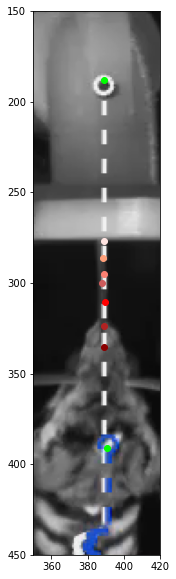

In [70]:
f = plt.figure(figsize = (6,10))

for ff in [50]:
    cap.set(cv2.CAP_PROP_POS_FRAMES, ff)
    ret, frame = cap.read()
    plt.imshow(frame)
    for k in key:
        coord = key[k]
        plt.scatter(df.loc[ff, key[k] + '_X'], df.loc[ff, key[k] + '_Y'],
                   color = key_color[key[k]])

plt.xlim([350,420])
plt.ylim([450, 150])

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


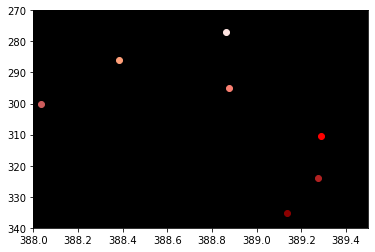

In [80]:
for k in key:
    coord = key[k]
    plt.scatter(df.loc[ff, key[k] + '_X'], df.loc[ff, key[k] + '_Y'], color = key_color[key[k]])
    
plt.xlim([388,389.5])
plt.ylim([340, 270])
ax = plt.axes()
ax.set_facecolor("black")

In [27]:
def reorder_columns(string):
    list_of_coord = list([column for column in df.columns if string in column and 'prob' in column])
    myorder = [0, 2, 3, 4, 5, 6, 1]
    mylist = [list_of_coord[i] for i in myorder]
    return(mylist)

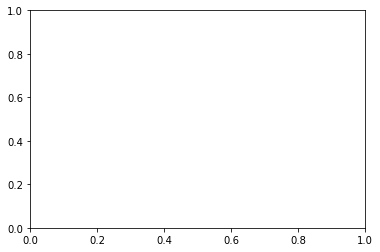

In [66]:
f = plt.figure()

for r, data in X_arr.iterrows():
    
    x = data.values
    y = Y_arr.loc[r, :].values
    xx_ = new_x[r]
    yy_ = new_y[r]
    
    plt.plot(x,y, 'ro')
    plt.plot(xx_, yy_, 'r-')
    ax = f.axes
    ax[0].invert_yaxis()
    plt.savefig(os.path.join('./dataFolder/computeInterpolation/', str(r).zfill(3) + '.png'))
    plt.cla()

In [ ]:
# from scipy import signal

# interpol_order = 2 # order for polynomial interpolation

# # parameters for the savitzky-golay filter
# savgol_win = 11
# savgol_polyorder = 3

# new_x = signal.savgol_filter(X_arr,
#                               window_length=savgol_win,
#                               polyorder=savgol_polyorder,
#                               axis=0)

# new_y = signal.savgol_filter(Y_arr,
#                               window_length=savgol_win,
#                               polyorder=savgol_polyorder,
#                               axis=0)

# plt.plot(x,y, 'ro')
# plt.plot(x, y, 'r-')